# Снос установки на Байкале

In [1]:
!date
!pwd

Пн июл  6 16:17:06 MSK 2020
/home/alena/SPHERE/Analysis/Telemetry


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
import datetime as dt
from math import pi
#чтобы датасеты с множеством колонок отображались полностью
pd.set_option('display.max_rows', 100, 'display.max_columns', 200)

In [3]:
plt.rcParams['figure.figsize'] =(8,4)
plt.rcParams['lines.markersize'] = 3
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['grid.alpha'] = 0.7
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 14
#plt.rcParams['font.size'] = 12

## Чтение данных

In [4]:
year = 2009
dirname = '~/SPHERE/ExpData/Data.telemetry/'
!ls $dirname

current_hv_code_everymin.dat  datum_2011_min.csv  datum_2013_sec.csv
currents_corrected.txt	      datum_2011_sec.csv  high_code.dat
datum_2009_sec.csv	      datum_2012_min.csv  high_kod.dat
datum_2010_min.csv	      datum_2012_sec.csv  telemetry_min.csv
datum_2010_sec.csv	      datum_2013_min.csv


In [5]:
# read data
dirname = '~/SPHERE/ExpData/Data.telemetry/'
datum = pd.read_csv(dirname + 'telemetry_min.csv', index_col=0)
print(datum.shape)
datum.head()

(7169, 37)


,mm,year,month,day,time,N,E,H,H-455,Gqi,Gsn,Ghdp,Ggs,compass,P0_code,T0_code,P_hpa0,"T0,C",P1_code,T1_code,P_hpa1,"T1,C","U15,V","U5,V","Uac,V","I,A","Tpow,C","Tmos,C","Bot,C","Top,C",Clin1,Clin2,ClinTh,run,dN,dE,utime
0,0,2010,3,7,123952,5148.0891,10424.4104,1416.1,961.1,1,8,1.0,-37.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.9,19.8,NaN,NaN,NaN,1,13.729398,103.538340,12:39:52
1,1,2010,3,7,124506,5148.0893,10424.4058,1418.2,963.2,1,8,1.0,-37.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,20.0,NaN,NaN,NaN,1,14.100462,98.246380,12:45:06
2,2,2010,3,7,124607,5148.0878,10424.4010,1419.4,964.4,1,8,1.0,-37.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.1,18.6,NaN,NaN,NaN,1,11.317476,92.724336,12:46:07
3,3,2010,3,7,124708,5148.0828,10424.4001,1419.5,964.5,1,8,1.0,-37.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.2,18.6,NaN,NaN,NaN,1,2.040856,91.688952,12:47:08
4,4,2010,3,7,124809,5148.0810,10424.4045,1419.8,964.8,1,8,1.0,-37.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.2,18.8,NaN,NaN,NaN,1,-1.298727,96.750827,12:48:09


In [10]:
datum.columns

Index(['mm', 'year', 'month', 'day', 'time', 'N', 'E', 'H', 'H-455', 'Gqi',
       'Gsn', 'Ghdp', 'Ggs', 'compass', 'P0_code', 'T0_code', 'P_hpa0', 'T0,C',
       'P1_code', 'T1_code', 'P_hpa1', 'T1,C', 'U15,V', 'U5,V', 'Uac,V', 'I,A',
       'Tpow,C', 'Tmos,C', 'Bot,C', 'Top,C', 'Clin1', 'Clin2', 'ClinTh', 'run',
       'dN', 'dE', 'utime'],
      dtype='object')

In [10]:
def plot_for_paper(year, name, yaxislabel, file=None):

    flights = datum[ (datum.year == year) ].run.max()
        
    # проверка на существование
    nodata = 0
    for i in range(1, flights + 1):
        data = datum[ (datum.year == year) & (datum.run == i) ]
        if len(data[['utime', name]].dropna()) == 0:
            nodata += 1
    if nodata == flights:
        return
    
    # рисование
    fmt = dates.DateFormatter('%H:%M')
    plcol = ['mP-','bx--', 'gs:', 'rd-.', 'co-', 'k*--']
    fig, ax = plt.subplots()

    for i in range(1, flights + 1):
        data = datum[ (datum.year == year) & (datum.run == i) ]
        data = data[['utime', name]].dropna()
        x = [dt.datetime.strptime(i, '%H:%M:%S') for i in data.utime]
        y = data[name]
        #print(year, i, len(y))   

        #label = 'flight ' + str(i)
        label = str(i)
        ax.plot(x, y, plcol[i-1], alpha=0.9, label = label)

    if name in ['H-455','ClinTh']:
        plt.ylim(0)
     
    ax.xaxis.set_major_formatter(fmt)
    plt.xlabel('Flight time, UTC')
    plt.ylabel(yaxislabel)
    ax.set_title(str(year))
    plt.legend(borderaxespad=0.1)
    plt.grid()
    
    # save file
    if file:
        plt.savefig(file, bbox_inches='tight')    

# Снос

In [7]:
df = datum
print(df.shape)
datum = datum[datum.year == year]
print(df.shape, datum.shape)

(7169, 37)
(7169, 37) (1428, 37)


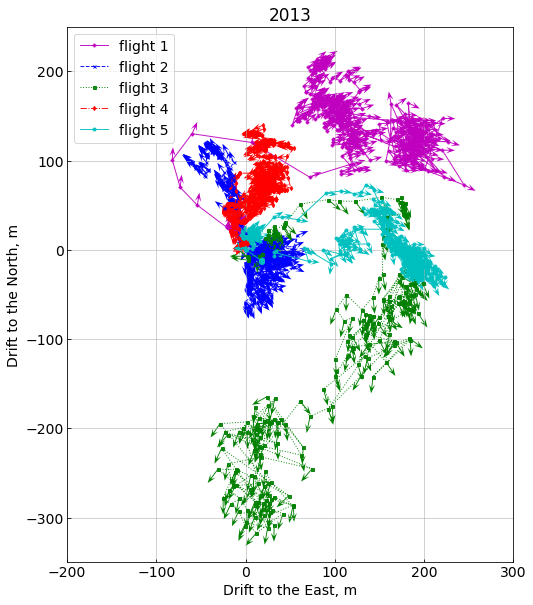

In [8]:
year = 2013
fig = plt.figure(figsize=(8,10.7))
ax2 = plt.subplot()
plt.rcParams['font.size'] = 14
datum = df[df.year == year]
shift = 90 # + 180
step = 1
plcol = ['mP-','bx--', 'gs:', 'rd-.', 'co-']
for i in range(5):
    U = 0.1 * np.cos((shift - datum.compass[datum.run == (i+1)]) * pi/180)[::step]
    V = 0.1 * np.sin((shift - datum.compass[datum.run == (i+1)]) * pi/180)[::step]
    x = datum.dE[datum.run == (i+1)][::step]
    y = datum.dN[datum.run == (i+1)][::step]
    qui = ax2.quiver(x,  y, U, V,
                     color=plcol[i][0], units='x', width=1.0, 
                     headwidth = 7, headlength  = 10, headaxislength = 6)
    label = 'flight ' + str(i+1)
    plt.plot(x, y, plcol[i],  alpha=0.9, label = label)
    #plt.scatter(x, y, color=plcol[i][0], s=1, label = None)
#plt.scatter(0, 0, s=50, c='m', marker='X', label = 'Start')
plt.xlim(-200,300)
plt.ylim(-350,250)
plt.gca().set_aspect('equal', adjustable='box')
#plt.axis('equal')    
plt.xlabel('Drift to the East, m')
plt.ylabel('Drift to the North, m')
plt.legend(loc=0)
plt.grid()
#plt.savefig('2012_GPS+quiver.pdf', bbox_inches='tight')
plt.title(str(year))
plt.savefig(str(year) + '_drift.png', bbox_inches='tight')

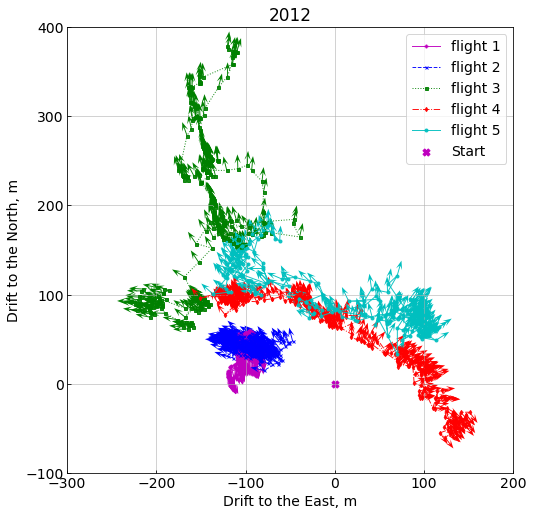

In [9]:
year = 2012
datum = df[df.year == year]

fig = plt.figure(figsize=(8,10.7))
ax2 = plt.subplot()
plt.rcParams['font.size'] = 14
shift = 90 # + 180
step = 1
plcol = ['mP-','bx--', 'gs:', 'rd-.', 'co-']
for i in range(5):
    U = 0.1 * np.cos((shift - datum.compass[datum.run == (i+1)]) * pi/180)[::step]
    V = 0.1 * np.sin((shift - datum.compass[datum.run == (i+1)]) * pi/180)[::step]
    x = datum.dE[datum.run == (i+1)][::step]
    y = datum.dN[datum.run == (i+1)][::step]
    qui = ax2.quiver(x,  y, U, V,
                     color=plcol[i][0], units='x', width=1.0, 
                     headwidth = 7, headlength  = 10, headaxislength = 6)
    label = 'flight ' + str(i+1)
    plt.plot(x, y, plcol[i],  alpha=0.9, label = label)
    #plt.scatter(x, y, color=plcol[i][0], s=1, label = None)
plt.scatter(0, 0, s=50, c='m', marker='X', label = 'Start')
plt.xlim(-300,200)
plt.ylim(-100,400)
plt.gca().set_aspect('equal', adjustable='box')
#plt.axis('equal')    
plt.xlabel('Drift to the East, m')
plt.ylabel('Drift to the North, m')
plt.legend(loc=0)
plt.grid()
plt.title(str(year))
plt.savefig(str(year) + '_drift.pdf', bbox_inches='tight')

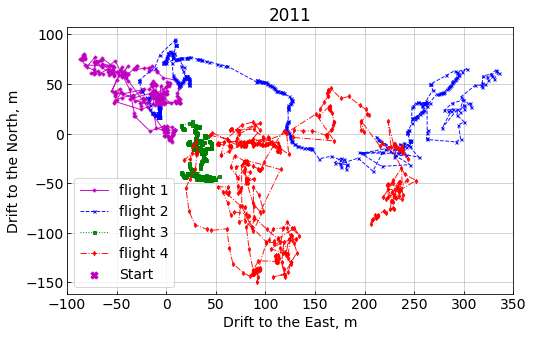

In [116]:
year = 2011
datum = df[df.year == year]

fig = plt.figure(figsize=(8,10.7))
ax2 = plt.subplot()
plt.rcParams['font.size'] = 14
shift = 90 # + 180
step = 1
plcol = ['mP-','bx--', 'gs:', 'rd-.', 'co-']
for i in range(4):
    U = 0.1 * np.cos((shift - datum.compass[datum.run == (i+1)]) * pi/180)[::step]
    V = 0.1 * np.sin((shift - datum.compass[datum.run == (i+1)]) * pi/180)[::step]
    x = datum.dE[datum.run == (i+1)][::step]
    y = datum.dN[datum.run == (i+1)][::step]
    if(year >= 2012):
        qui = ax2.quiver(x,  y, U, V,
                         color=plcol[i][0], units='x', width=1.0, 
                         headwidth = 7, headlength  = 10, headaxislength = 6)
    label = 'flight ' + str(i+1)
    plt.plot(x, y, plcol[i],  alpha=0.9, label = label)
    #plt.scatter(x, y, color=plcol[i][0], s=1, label = None)
plt.scatter(0, 0, s=50, c='m', marker='X', label = 'Start')
plt.xlim(-100,350)
#plt.ylim(-350,250)
plt.gca().set_aspect('equal', adjustable='box')
#plt.axis('equal')    
plt.xlabel('Drift to the East, m')
plt.ylabel('Drift to the North, m')
plt.legend(loc=0)
plt.grid()
plt.title(str(year))
plt.savefig(str(year) + '_drift.png', bbox_inches='tight')

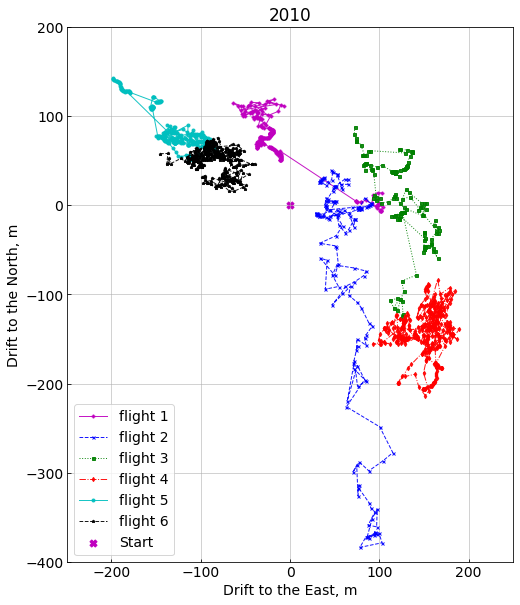

In [117]:
year = 2010
datum = df[df.year == year]

fig = plt.figure(figsize=(8,10.7))
ax2 = plt.subplot()
plt.rcParams['font.size'] = 14
shift = 90 # + 180
step = 1
plcol = ['mP-','bx--', 'gs:', 'rd-.', 'co-', 'k*--']
for i in range(6):
    U = 0.1 * np.cos((shift - datum.compass[datum.run == (i+1)]) * pi/180)[::step]
    V = 0.1 * np.sin((shift - datum.compass[datum.run == (i+1)]) * pi/180)[::step]
    x = datum.dE[datum.run == (i+1)][::step]
    y = datum.dN[datum.run == (i+1)][::step]
    if(year >= 2012):
        qui = ax2.quiver(x,  y, U, V,
                         color=plcol[i][0], units='x', width=1.0, 
                         headwidth = 7, headlength  = 10, headaxislength = 6)
    label = 'flight ' + str(i+1)
    plt.plot(x, y, plcol[i],  alpha=0.9, label = label)
    #plt.scatter(x, y, color=plcol[i][0], s=1, label = None)
plt.scatter(0, 0, s=50, c='m', marker='X', label = 'Start')
plt.xlim(-250,250)
plt.ylim(-400,200)
plt.gca().set_aspect('equal', adjustable='box')
#plt.axis('equal')    
plt.xlabel('Drift to the East, m')
plt.ylabel('Drift to the North, m')
plt.legend(loc=0)
plt.grid()
plt.title(str(year))
plt.savefig(str(year) + '_drift.png', bbox_inches='tight')

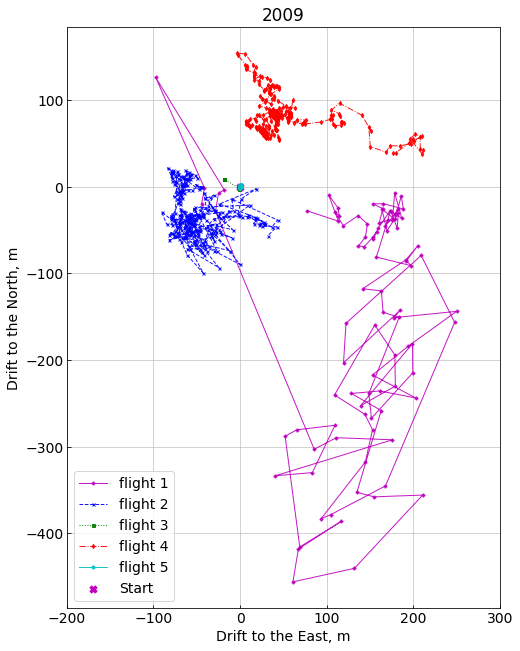

In [118]:
year = 2009
datum = df[df.year == year]

fig = plt.figure(figsize=(8,10.7))
ax2 = plt.subplot()
plt.rcParams['font.size'] = 14
shift = 90 # + 180
step = 1
plcol = ['mP-','bx--', 'gs:', 'rd-.', 'co-', 'k*--']
for i in range(5):
    U = 0.1 * np.cos((shift - datum.compass[datum.run == (i+1)]) * pi/180)[::step]
    V = 0.1 * np.sin((shift - datum.compass[datum.run == (i+1)]) * pi/180)[::step]
    x = datum.dE[datum.run == (i+1)][::step]
    y = datum.dN[datum.run == (i+1)][::step]
    if(year >= 2012):
        qui = ax2.quiver(x,  y, U, V,
                         color=plcol[i][0], units='x', width=1.0, 
                         headwidth = 7, headlength  = 10, headaxislength = 6)
    label = 'flight ' + str(i+1)
    plt.plot(x, y, plcol[i],  alpha=0.9, label = label)
    #plt.scatter(x, y, color=plcol[i][0], s=1, label = None)
plt.scatter(0, 0, s=50, c='m', marker='X', label = 'Start')
plt.xlim(-200,300)
#plt.ylim(-350,250)
plt.gca().set_aspect('equal', adjustable='box')
#plt.axis('equal')    
plt.xlabel('Drift to the East, m')
plt.ylabel('Drift to the North, m')
plt.legend(loc=0)
plt.grid()
plt.title(str(year))
plt.savefig(str(year) + '_drift.png', bbox_inches='tight')

# Все годы

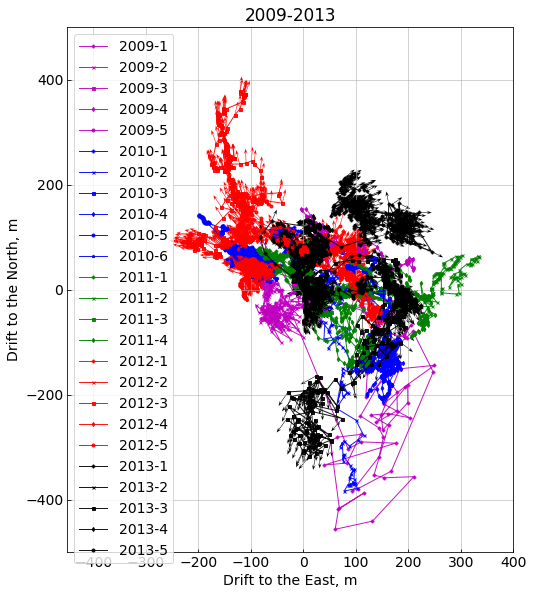

In [121]:
fig = plt.figure(figsize=(8,10.7))
ax2 = plt.subplot()
plt.rcParams['font.size'] = 14
shift = 90 # + 180
step = 1
plcol = ['mP-','bx--', 'gs:', 'rd-.', 'co-', 'k*--']
colors  = ['m', 'b', 'g', 'r', 'k', 'c']
markers = ['P', 'x', 's', 'd', 'o', '*']

for year in range(2009, 2014):
    datum = df[df.year == year]
    flights = datum.run.max()
    for i in range(flights):
        U = 0.1 * np.cos((shift - datum.compass[datum.run == (i+1)]) * pi/180)[::step]
        V = 0.1 * np.sin((shift - datum.compass[datum.run == (i+1)]) * pi/180)[::step]
        x = datum.dE[datum.run == (i+1)][::step]
        y = datum.dN[datum.run == (i+1)][::step]
        if(year >= 2012):
            qui = ax2.quiver(x,  y, U, V,
                             color=colors[year-2009],
                             #color=plcol[i][0], 
                             units='x', width=1.0, 
                             headwidth = 7, headlength  = 10, headaxislength = 6)
        label = str(year) + '-' + str(i+1)
        #plt.plot(x, y, plcol[i],  alpha=0.9, label = label)
        plt.plot(x, y, color=colors[year-2009], marker=markers[i],  alpha=0.9, label = label)

plt.xlim(-450,400)
plt.ylim(-500,500)
plt.gca().set_aspect('equal', adjustable='box')   
plt.xlabel('Drift to the East, m')
plt.ylabel('Drift to the North, m')
plt.legend(loc=0)
plt.grid()
plt.title('2009-2013')
plt.savefig('all_drift.png', bbox_inches='tight')

2012 5
2013 5


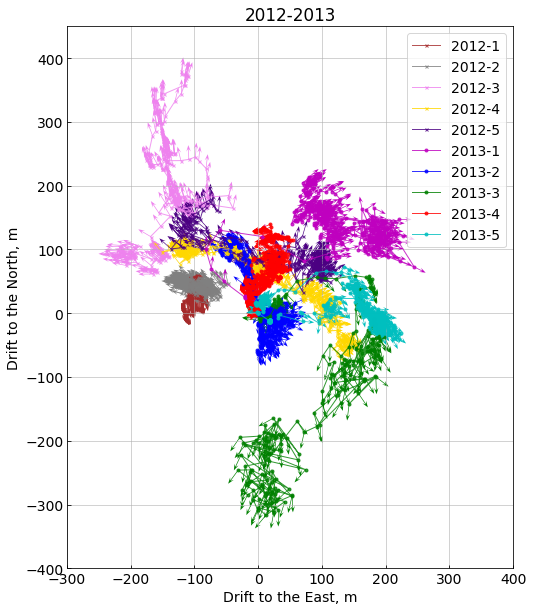

In [122]:
fig = plt.figure(figsize=(8,10.7))
ax2 = plt.subplot()
plt.rcParams['font.size'] = 14
shift = 90 
step = 1
plcol = ['mP-','bx--', 'gs:', 'rd-.', 'co-', 'k*--']
colors  = ['brown', 'grey', 'violet', 'gold', 'indigo', 'm', 'b', 'g', 'r', 'c']
#colors = [ 'brown', 'grey', 'cyan', 'gold', 'indigo', 'b', 'orange', 'g', 'r', 'violet']
markers = ['d', 'P', 's', 'x', 'o', '*']
j = -1
for year in range(2012, 2014):
    datum = df[df.year == year]
    flights = datum.run.max()
    print(year, flights)
    for i in range(flights):
        j += 1
        U = 0.1 * np.cos((shift - datum.compass[datum.run == (i+1)]) * pi/180)[::step]
        V = 0.1 * np.sin((shift - datum.compass[datum.run == (i+1)]) * pi/180)[::step]
        x = datum.dE[datum.run == (i+1)][::step]
        y = datum.dN[datum.run == (i+1)][::step]
        if(year >= 2012):
            qui = ax2.quiver(x,  y, U, V,
                             color=colors[j],
                             units='x', width=1.0, 
                             headwidth = 7, headlength  = 10, headaxislength = 6)
        label = str(year) + '-' + str(i+1)
        plt.plot(x, y, color=colors[j], marker=markers[year-2009], alpha=0.8, label = label)  # color=plcol[i][0],
        #plt.plot(x, y, color=colors[year-2009], marker=markers[i],  alpha=0.9, label = label)

plt.xlim(-300,400)
plt.ylim(-400,450)
plt.gca().set_aspect('equal', adjustable='box')   
plt.xlabel('Drift to the East, m')
plt.ylabel('Drift to the North, m')
plt.legend(loc=0)
plt.grid()
plt.title('2012-2013')
plt.savefig('2012-2013_drift.png', bbox_inches='tight')

In [48]:
datum[datum.run == 1]

,mm,year,month,day,time,N,E,H,H-455,Gqi,Gsn,Ghdp,Ggs,compass,P0_code,T0_code,P_hpa0,"T0,C",P1_code,T1_code,P_hpa1,"T1,C","U15,V","U5,V","Uac,V","I,A","Tpow,C","Tmos,C","Bot,C","Top,C",Clin1,Clin2,ClinTh,run,dN,dE,utime
0,0,2009,2,25,122706,5148.0498,10424.4044,1262.9,807.9,2,9,1.4,-35.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.7,20.3,NaN,NaN,NaN,1,-27.829860,77.078542,12:27:06
60,60,2009,2,25,123146,5148.0433,10424.4360,1251.6,796.6,2,9,1.9,-35.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.3,20.3,NaN,NaN,NaN,1,-39.889466,113.432004,12:31:46
120,120,2009,2,25,123246,5148.0597,10424.4263,1256.4,801.4,2,9,1.9,-35.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.4,20.3,NaN,NaN,NaN,1,-9.462152,102.272871,12:32:46
180,180,2009,2,25,123346,5148.0516,10424.4356,1256.0,801.0,2,9,1.9,-35.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.6,20.5,NaN,NaN,NaN,1,-24.490277,112.971833,12:33:46
240,240,2009,2,25,123446,5148.0466,10424.4369,1254.9,799.9,2,9,1.9,-35.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.6,20.6,NaN,NaN,NaN,1,-33.766897,114.467387,12:34:46
300,300,2009,2,25,123546,5148.0492,10424.4322,1253.9,798.9,2,9,1.9,-35.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.6,20.8,NaN,NaN,NaN,1,-28.943054,109.060385,12:35:46
360,360,2009,2,25,123646,5148.0405,10424.4410,1256.1,801.1,2,8,1.9,-35.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.9,20.9,NaN,NaN,NaN,1,-45.084373,119.184134,12:36:46
420,420,2009,2,25,123746,5148.0468,10424.4559,1248.6,793.6,2,8,1.9,-35.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.8,21.1,NaN,NaN,NaN,1,-33.395832,136.325481,12:37:46
480,480,2009,2,25,123846,5148.0416,10424.4651,1247.0,792.0,2,8,1.9,-35.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.9,21.2,NaN,NaN,NaN,1,-43.043517,146.909400,12:38:46
540,540,2009,2,25,123946,5148.0334,10424.4632,1243.3,788.3,2,8,1.9,-35.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,21.4,NaN,NaN,NaN,1,-58.257174,144.723591,12:39:46
